In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go
from sklearn.decomposition import PCA

from sklearn import set_config
set_config(transform_output="pandas")

In [2]:
url = f"https://drive.google.com/file/d/1fkXgSanK64YOuGo1N1GTd6ejjZ-Pvc6m/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
# Create a Pandas DataFrame from the CSV data
df = pd.read_csv(path)
df

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
5231,5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
5232,5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
5233,5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...


In [3]:
df.columns =df.columns.str.strip()

In [4]:
duplicate_ids = df[df.duplicated(subset='id', keep=False)]

if not duplicate_ids.empty:
    print(f"{duplicate_ids.shape[0]} rows with duplicate ids were found:")
    display(duplicate_ids.sort_values('id'))
else:
    print("There are no duplicate ids.")

126 rows with duplicate ids were found:


,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
1560,1560,Raise Your Glass ...,P!nk,0.700,0.708,7,-4.952,1,0.0869,0.00624,0.000000,0.0310,0.619,122.029,,203267,4,05qq6mwIbG1ZsQhlMKyDwN,https://open.spotify.com/track/05qq6mwIbG1ZsQh...
742,742,Raise Your Glass ...,P!nk,0.700,0.708,7,-4.952,1,0.0869,0.00624,0.000000,0.0310,0.619,122.029,,203267,4,05qq6mwIbG1ZsQhlMKyDwN,https://open.spotify.com/track/05qq6mwIbG1ZsQh...
1556,1556,Don't Stop The Music ...,Rihanna,0.835,0.669,6,-5.582,0,0.0643,0.03360,0.000069,0.0535,0.542,122.668,,267080,4,0ByMNEPAPpOR5H69DVrTNy,https://open.spotify.com/track/0ByMNEPAPpOR5H6...
575,575,Don't Stop The Music ...,Rihanna,0.835,0.669,6,-5.582,0,0.0643,0.03360,0.000069,0.0535,0.542,122.668,,267080,4,0ByMNEPAPpOR5H69DVrTNy,https://open.spotify.com/track/0ByMNEPAPpOR5H6...
670,670,Low (feat. T-Pain) ...,Flo Rida,0.918,0.609,10,-5.640,0,0.0791,0.09280,0.000000,0.1390,0.304,128.008,,231400,4,0CAfXk7DXMnon4gLudAp7J,https://open.spotify.com/track/0CAfXk7DXMnon4g...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1387,Gangsta's Paradise ...,Coolio,0.647,0.514,8,-10.050,1,0.0593,0.06550,0.000000,0.3980,0.387,79.974,,240693,4,7lQWRAjyhTpCWFC0jmclT4,https://open.spotify.com/track/7lQWRAjyhTpCWFC...
2199,2199,"One, Two Step (feat. Missy Elliott) ...",Ciara,0.944,0.511,5,-10.960,0,0.1610,0.04200,0.001070,0.0379,0.842,113.046,,203787,4,7uKcScNXuO3MWw6LowBjW1,https://open.spotify.com/track/7uKcScNXuO3MWw6...
1631,1631,"One, Two Step (feat. Missy Elliott) ...",Ciara,0.944,0.511,5,-10.960,0,0.1610,0.04200,0.001070,0.0379,0.842,113.046,,203787,4,7uKcScNXuO3MWw6LowBjW1,https://open.spotify.com/track/7uKcScNXuO3MWw6...
1686,1686,One Last Time ...,Ariana Grande,0.628,0.593,8,-5.036,1,0.0323,0.09300,0.000002,0.0960,0.104,125.026,,197267,4,7xoUc6faLbCqZO6fQEYprd,https://open.spotify.com/track/7xoUc6faLbCqZO6...


In [5]:
duplicate_ids = df[df.duplicated(subset='id', keep=False)]

duplicate_ids.sort_values('id').head(10)

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
1560,1560,Raise Your Glass ...,P!nk,0.700,0.708,7,-4.952,1,0.0869,0.00624,0.000000,0.0310,0.619,122.029,,203267,4,05qq6mwIbG1ZsQhlMKyDwN,https://open.spotify.com/track/05qq6mwIbG1ZsQh...
742,742,Raise Your Glass ...,P!nk,0.700,0.708,7,-4.952,1,0.0869,0.00624,0.000000,0.0310,0.619,122.029,,203267,4,05qq6mwIbG1ZsQhlMKyDwN,https://open.spotify.com/track/05qq6mwIbG1ZsQh...
1556,1556,Don't Stop The Music ...,Rihanna,0.835,0.669,6,-5.582,0,0.0643,0.03360,0.000069,0.0535,0.542,122.668,,267080,4,0ByMNEPAPpOR5H69DVrTNy,https://open.spotify.com/track/0ByMNEPAPpOR5H6...
575,575,Don't Stop The Music ...,Rihanna,0.835,0.669,6,-5.582,0,0.0643,0.03360,0.000069,0.0535,0.542,122.668,,267080,4,0ByMNEPAPpOR5H69DVrTNy,https://open.spotify.com/track/0ByMNEPAPpOR5H6...
670,670,Low (feat. T-Pain) ...,Flo Rida,0.918,0.609,10,-5.640,0,0.0791,0.09280,0.000000,0.1390,0.304,128.008,,231400,4,0CAfXk7DXMnon4gLudAp7J,https://open.spotify.com/track/0CAfXk7DXMnon4g...
1577,1577,Low (feat. T-Pain) ...,Flo Rida,0.918,0.609,10,-5.640,0,0.0791,0.09280,0.000000,0.1390,0.304,128.008,,231400,4,0CAfXk7DXMnon4gLudAp7J,https://open.spotify.com/track/0CAfXk7DXMnon4g...
674,674,In My Mind ...,Dynoro,0.694,0.770,6,-5.335,1,0.1490,0.17600,0.000011,0.1180,0.163,125.905,,184560,4,0E9ZjEAyAwOXZ7wJC0PD33,https://open.spotify.com/track/0E9ZjEAyAwOXZ7w...
2956,2956,In My Mind ...,Dynoro,0.694,0.770,6,-5.335,1,0.1490,0.17600,0.000011,0.1180,0.163,125.905,,184560,4,0E9ZjEAyAwOXZ7wJC0PD33,https://open.spotify.com/track/0E9ZjEAyAwOXZ7w...
668,668,Levels - Radio Edit ...,Avicii,0.620,0.881,1,-5.851,0,0.0372,0.05850,0.714000,0.3110,0.415,126.035,,199904,4,0JhKJg5ejeQ8jq89UQtnw8,https://open.spotify.com/track/0JhKJg5ejeQ8jq8...
2666,2666,Levels - Radio Edit ...,Avicii,0.620,0.881,1,-5.851,0,0.0372,0.05850,0.714000,0.3110,0.415,126.035,,199904,4,0JhKJg5ejeQ8jq89UQtnw8,https://open.spotify.com/track/0JhKJg5ejeQ8jq8...


In [6]:
columns_to_keep= ['id','artist', 'name', 'danceability', 'energy','mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
Df=df[columns_to_keep]
Df.set_index('name', inplace=True)
Df

,id,artist,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,1n7JnwviZ7zf0LR1tcGFq7,Gilberto Gil,0.6580,0.25900,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376
Saudade De Bahia,5QGM1U0eCYrQuwSJwTm5Zq,Antônio Carlos Jobim,0.7420,0.39900,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039
"Canta Canta, Minha Gente",0NLIFSZxPzQhCwnkn5PJYs,Martinho Da Vila,0.8510,0.73000,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698
Mulher Eu Sei,3mXqOdlLE1k67WsAxryPFs,Chico César,0.7050,0.05020,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802
Rosa Morena,7bSzjzjTkWT2CkIPPdp0eA,Kurt Elling,0.6510,0.11900,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941
...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",1aEhYlZtypmipA06SDJ4U3,Pyotr Ilyich Tchaikovsky,0.2020,0.06940,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",1Gfqe7TAKklmuZf6hxsH6h,Tristan Murail,0.1880,0.10100,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",2XNwnFrdMDpismp0VUZ7cU,Arnold Schoenberg,0.0596,0.00093,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573


In [7]:
duplicate_ids = Df[Df.duplicated(subset='id', keep=False)]

exact_duplicates = duplicate_ids[duplicate_ids.duplicated(keep=False)]

print(f"Number of duplicate ids where all columns are exactly the same: {exact_duplicates.shape[0]}")

Number of duplicate ids where all columns are exactly the same: 126


In [8]:
df_unique = Df.drop_duplicates(subset='id', keep='first')
df_unique

,id,artist,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,1n7JnwviZ7zf0LR1tcGFq7,Gilberto Gil,0.6580,0.25900,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376
Saudade De Bahia,5QGM1U0eCYrQuwSJwTm5Zq,Antônio Carlos Jobim,0.7420,0.39900,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039
"Canta Canta, Minha Gente",0NLIFSZxPzQhCwnkn5PJYs,Martinho Da Vila,0.8510,0.73000,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698
Mulher Eu Sei,3mXqOdlLE1k67WsAxryPFs,Chico César,0.7050,0.05020,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802
Rosa Morena,7bSzjzjTkWT2CkIPPdp0eA,Kurt Elling,0.6510,0.11900,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941
...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",1aEhYlZtypmipA06SDJ4U3,Pyotr Ilyich Tchaikovsky,0.2020,0.06940,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",1Gfqe7TAKklmuZf6hxsH6h,Tristan Murail,0.1880,0.10100,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",2XNwnFrdMDpismp0VUZ7cU,Arnold Schoenberg,0.0596,0.00093,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573


In [9]:
songs_df = df_unique[ ['danceability', 'energy','mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
songs_df

,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,,,,,,,,,
Se Eu Quiser Falar Com Deus,0.6580,0.25900,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376
Saudade De Bahia,0.7420,0.39900,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039
"Canta Canta, Minha Gente",0.8510,0.73000,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698
Mulher Eu Sei,0.7050,0.05020,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802
Rosa Morena,0.6510,0.11900,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941
...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.2020,0.06940,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.1880,0.10100,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.0596,0.00093,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573


In [10]:
scaler = MinMaxScaler()
scaled_min_max_df = scaler.fit_transform(songs_df)
scaled_min_max_df = pd.DataFrame(scaled_min_max_df, columns=songs_df.columns)
scaled_min_max_df

,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,,,,,,,,,
Se Eu Quiser Falar Com Deus,0.680455,0.25900,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800
Saudade De Bahia,0.767322,0.39900,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322
"Canta Canta, Minha Gente",0.880041,0.73000,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862
Mulher Eu Sei,0.729059,0.05020,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098
Rosa Morena,0.673216,0.11900,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171
...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.208893,0.06940,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.194416,0.10100,1.0,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.061634,0.00093,1.0,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469


In [11]:
scaler = StandardScaler()
scaled_standard_df = scaler.fit_transform(songs_df)
scaled_standard_df = pd.DataFrame(scaled_standard_df, columns=songs_df.columns)
scaled_standard_df

,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,,,,,,,,,
Se Eu Quiser Falar Com Deus,0.689639,-1.362242,-1.354614,-0.178051,1.128628,-0.699987,5.275601,-0.490275,-0.290049
Saudade De Bahia,1.074820,-0.878543,0.738218,-0.682767,-0.208153,-0.700140,-0.525087,0.902309,0.222910
"Canta Canta, Minha Gente",1.574637,0.265060,0.738218,3.709250,0.453232,-0.699974,-0.411479,1.665172,-0.873499
Mulher Eu Sei,0.905157,-2.083645,0.738218,-0.507030,1.647086,-0.700036,1.339420,0.294178,-0.415079
Rosa Morena,0.657541,-1.845941,0.738218,-0.634967,1.750778,-0.699222,-0.545136,-0.144828,0.079549
...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",-1.401339,-2.017309,0.738218,-0.504219,1.753581,1.222840,-0.684138,-1.355693,-1.076122
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",-1.465535,-1.908131,0.738218,-0.547801,1.579827,0.445577,-0.776361,-1.463645,-1.243062
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",-2.054311,-2.253873,0.738218,-0.559049,1.848865,1.905970,-0.724235,-1.467604,-1.647504


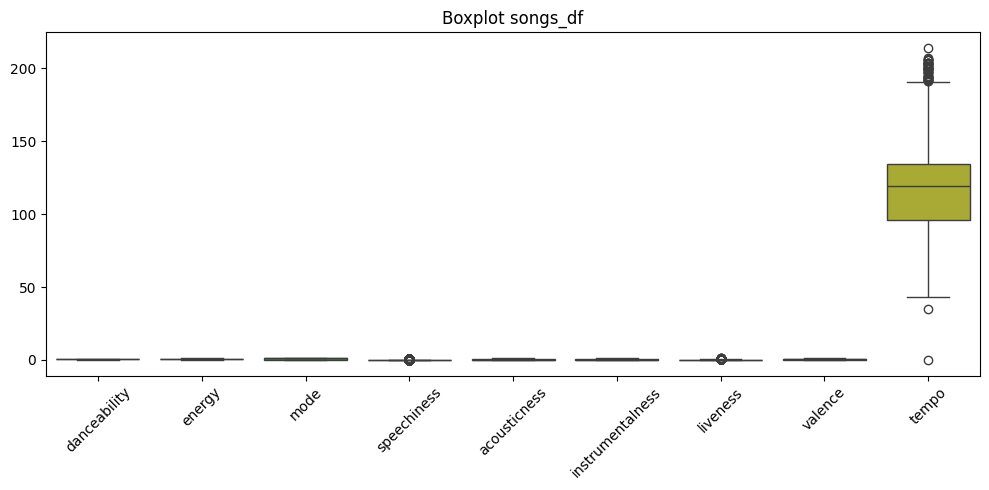

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=songs_df)
plt.title("Boxplot songs_df")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


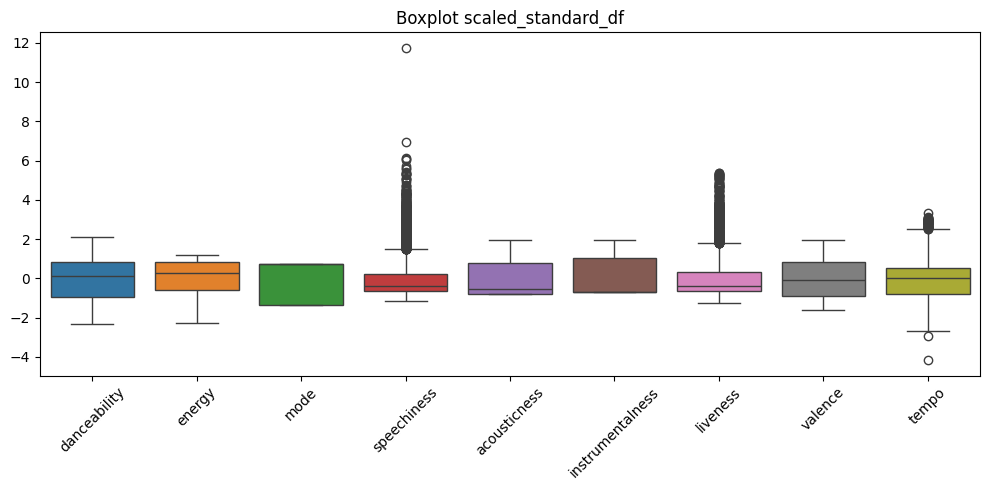

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=scaled_standard_df)
plt.title("Boxplot scaled_standard_df")
plt.xticks(
    ticks=range(len(scaled_standard_df.columns)),
    labels=scaled_standard_df.columns,
    rotation=45
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

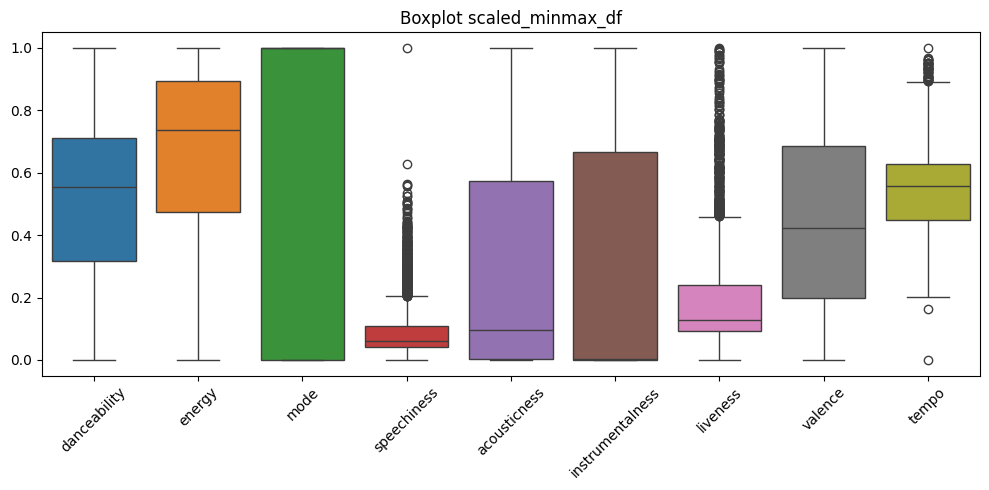

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=scaled_min_max_df)
plt.title("Boxplot scaled_minmax_df")
plt.xticks(
    ticks=range(len(scaled_standard_df.columns)),
    labels=scaled_min_max_df.columns,
    rotation=45
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
songs_df.to_csv("songs_df.csv", index=False)
from google.colab import files
files.download("songs_df.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
pca = PCA()

# Fit the PCA object to the data
pca.fit(scaled_standard_df)

# Transform scaled_features_df based on the fit calculations
pca_basic_df = pca.transform(scaled_standard_df)
pca_basic_df

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8
name,,,,,,,,,
Se Eu Quiser Falar Com Deus,0.190150,0.627854,-2.000545,4.511471,2.891232,0.331232,-0.504147,0.747633,-0.224192
Saudade De Bahia,-0.640999,1.634667,0.931556,-0.272710,-0.054570,-0.117078,0.022250,0.387573,-0.647092
"Canta Canta, Minha Gente",-2.111960,0.816461,-0.630124,0.573576,-2.346800,2.958252,0.949005,-0.358797,0.335623
Mulher Eu Sei,0.903475,2.373680,0.317593,1.861837,0.616249,0.710840,-0.247031,0.418676,-0.281873
Rosa Morena,1.275018,2.304986,0.731254,0.041263,0.158361,0.771454,-0.653606,0.372887,0.071347
...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",3.715947,0.523816,0.334498,0.181260,-0.677852,0.316408,-0.138353,-0.114438,-0.218252
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",3.379958,0.632048,0.334165,0.215085,-0.877731,0.170900,-0.837523,-0.267136,-0.253863
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",4.582478,0.228143,0.173190,0.315928,-1.007169,0.092315,0.220843,-0.417417,-0.417639


In [17]:
explained_variance_array = pca.explained_variance_ratio_

explained_variance_array

array([0.27677701, 0.20369155, 0.11400034, 0.10760904, 0.10345322,
       0.09053837, 0.05645093, 0.03293188, 0.01454767])

In [18]:
pd.DataFrame(explained_variance_array, columns=["Variance explained"])

,Variance explained
0,0.276777
1,0.203692
2,0.114000
3,0.107609
4,0.103453
5,0.090538
6,0.056451
7,0.032932
8,0.014548


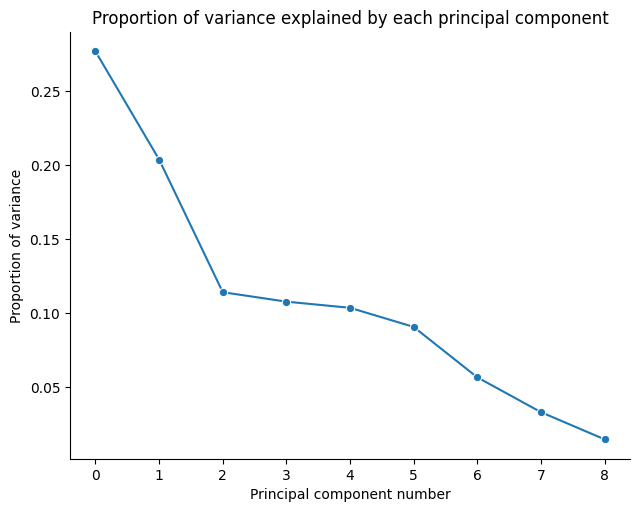

In [19]:
# Create a Pandas DataFrame from the variance explained array
explained_variance_array_df = pd.DataFrame(explained_variance_array, columns=["Variance explained"])

(
  # Create a line chart with sns.relplot
  sns.relplot(
      kind = 'line',
      data = explained_variance_array_df,
      x = explained_variance_array_df.index,
      y = "Variance explained",
      marker = 'o',
      aspect = 1.3)
  # Set the title of the plot
  .set(title = "Proportion of variance explained by each principal component")
  # Set the axis labels
  .set_axis_labels("Principal component number", "Proportion of variance")
);

In [20]:
elbow = 5
pca_elbow = PCA(n_components = elbow + 1)

# Fit the PCA object to the scaled features dataframe and transform it
pca_elbow_df = pca_elbow.fit_transform(scaled_standard_df)

# The dataframe now contains the principal components of the scaled features dataframe
pca_elbow_df

,pca0,pca1,pca2,pca3,pca4,pca5
name,,,,,,
Se Eu Quiser Falar Com Deus,0.190150,0.627854,-2.000545,4.511471,2.891232,0.331232
Saudade De Bahia,-0.640999,1.634667,0.931556,-0.272710,-0.054570,-0.117078
"Canta Canta, Minha Gente",-2.111960,0.816461,-0.630124,0.573576,-2.346800,2.958252
Mulher Eu Sei,0.903475,2.373680,0.317593,1.861837,0.616249,0.710840
Rosa Morena,1.275018,2.304986,0.731254,0.041263,0.158361,0.771454
...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",3.715947,0.523816,0.334498,0.181260,-0.677852,0.316408
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",3.379958,0.632048,0.334165,0.215085,-0.877731,0.170900
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",4.582478,0.228143,0.173190,0.315928,-1.007169,0.092315


In [21]:
cumulative_sum_of_variance = np.cumsum(explained_variance_array)

cumulative_sum_of_variance

array([0.27677701, 0.48046855, 0.59446889, 0.70207793, 0.80553115,
       0.89606952, 0.95252045, 0.98545233, 1.        ])

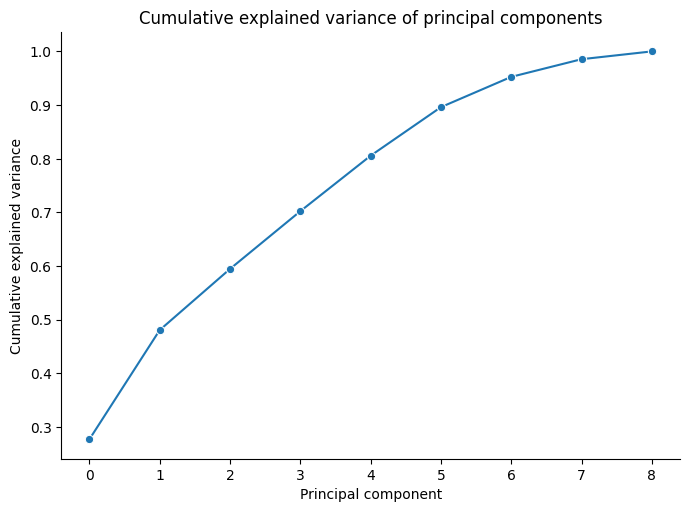

In [22]:
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(explained_variance_array)),  # Set the x-axis to be the principal component index
      y = cumulative_sum_of_variance,  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Set the title of the plot
  .set(title = "Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

In [23]:
pca_variance = PCA(n_components = 0.95)

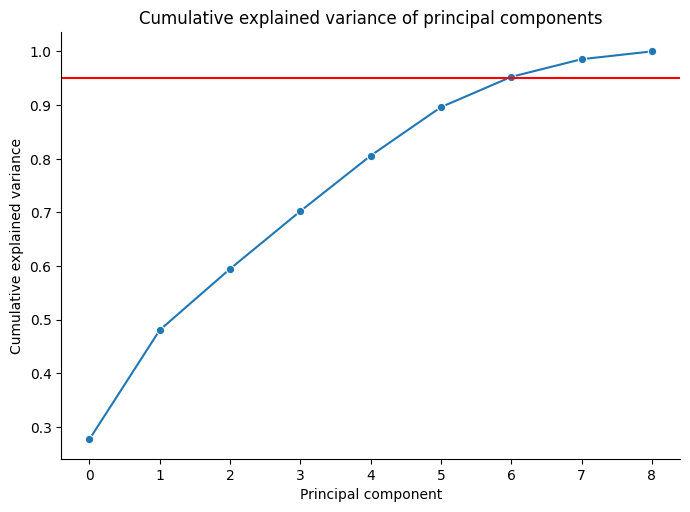

In [24]:
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(explained_variance_array)),  # Set the x-axis to be the principal component index
      y = cumulative_sum_of_variance,  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Set the title of the plot
  .set(title="Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y = 0.95,
            color = 'red');

In [25]:
# Fit the PCA object to the scaled features dataframe and transform it
pca_variance_df = pca_variance.fit_transform(scaled_standard_df)

# The dataframe now contains the principal components of the scaled features dataframe
pca_variance_df


,pca0,pca1,pca2,pca3,pca4,pca5,pca6
name,,,,,,,
Se Eu Quiser Falar Com Deus,0.190150,0.627854,-2.000545,4.511471,2.891232,0.331232,-0.504147
Saudade De Bahia,-0.640999,1.634667,0.931556,-0.272710,-0.054570,-0.117078,0.022250
"Canta Canta, Minha Gente",-2.111960,0.816461,-0.630124,0.573576,-2.346800,2.958252,0.949005
Mulher Eu Sei,0.903475,2.373680,0.317593,1.861837,0.616249,0.710840,-0.247031
Rosa Morena,1.275018,2.304986,0.731254,0.041263,0.158361,0.771454,-0.653606
...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",3.715947,0.523816,0.334498,0.181260,-0.677852,0.316408,-0.138353
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",3.379958,0.632048,0.334165,0.215085,-0.877731,0.170900,-0.837523
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",4.582478,0.228143,0.173190,0.315928,-1.007169,0.092315,0.220843


In [26]:

seed =234

max_k = 100

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for i in range(20, max_k + 1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = i,
                      n_init = "auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(pca_variance_df)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

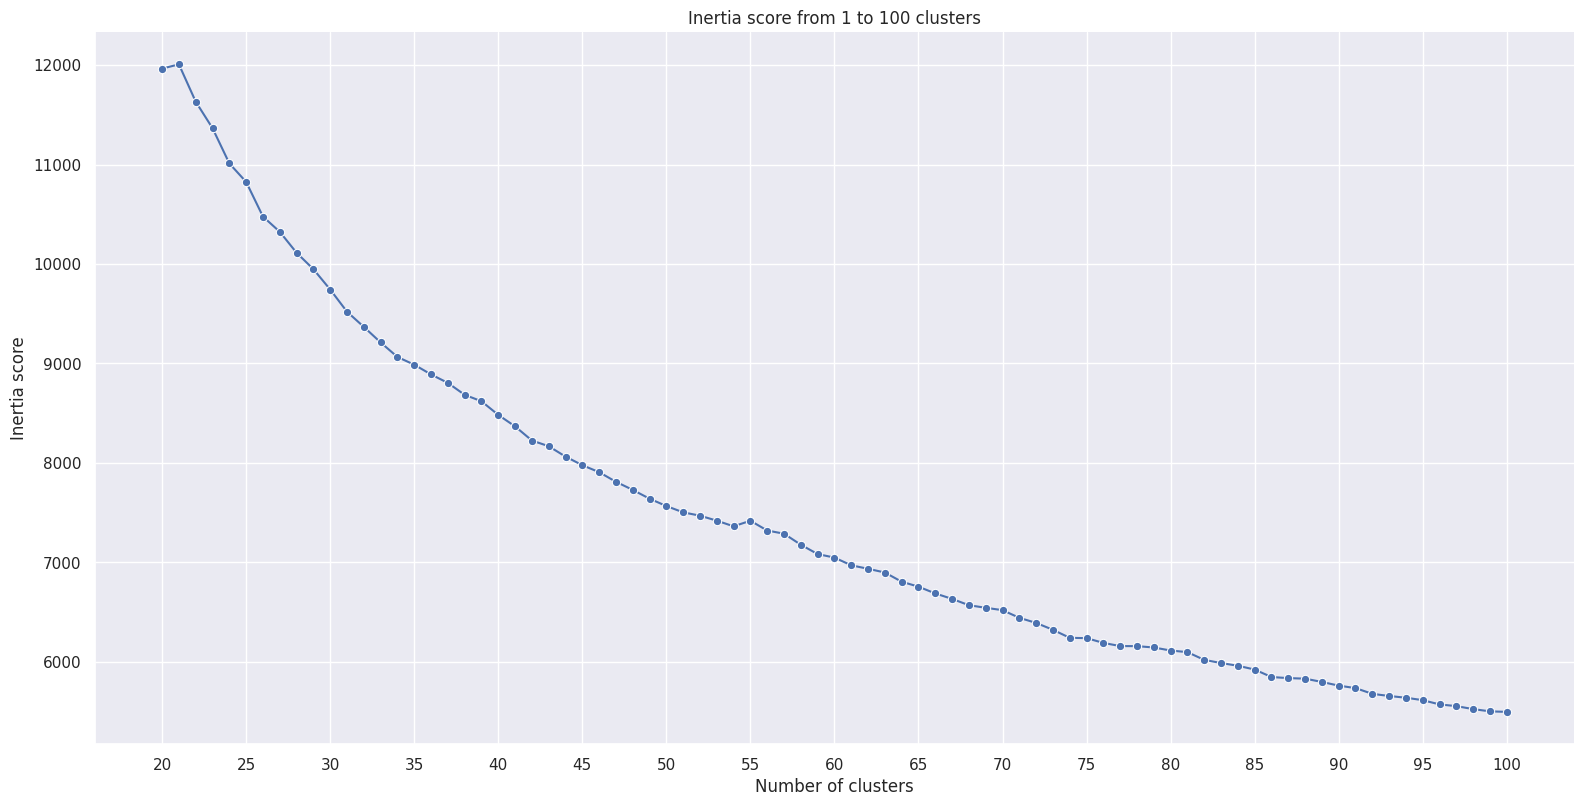

In [27]:

sns.set_theme(style='darkgrid')

(

sns.relplot(y = inertia_list,
            x = range(20, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
.set(xticks=list(range(20, max_k + 1, 5)))
);

In [28]:

max_k = 100

sil_scores = []


for j in range(20, max_k):


    kmeans = KMeans(n_clusters = j,
                    n_init = "auto",
                    random_state = seed)

    # Fit the KMeans model to the scaled data
    kmeans.fit(pca_variance_df)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    score = silhouette_score(pca_variance_df, labels)

    # Append the silhouette score to the list
    sil_scores.append(score)

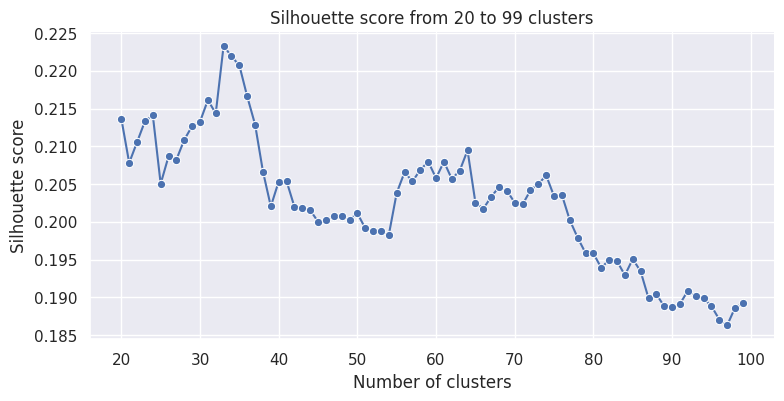

In [29]:
(
sns.relplot(y = sil_scores,
            x = range(20, max_k),
            kind = 'line',
            marker = 'o',
            height = 4,
            aspect = 2)
.set(title=f"Silhouette score from 20 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

In [30]:
df_unique= df_unique.reset_index()
df_unique

,name,id,artist,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Se Eu Quiser Falar Com Deus ...,1n7JnwviZ7zf0LR1tcGFq7,Gilberto Gil,0.6580,0.25900,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376
1,Saudade De Bahia ...,5QGM1U0eCYrQuwSJwTm5Zq,Antônio Carlos Jobim,0.7420,0.39900,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039
2,"Canta Canta, Minha Gente ...",0NLIFSZxPzQhCwnkn5PJYs,Martinho Da Vila,0.8510,0.73000,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698
3,Mulher Eu Sei ...,3mXqOdlLE1k67WsAxryPFs,Chico César,0.7050,0.05020,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802
4,Rosa Morena ...,7bSzjzjTkWT2CkIPPdp0eA,Kurt Elling,0.6510,0.11900,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941
...,...,...,...,...,...,...,...,...,...,...,...,...
5166,"1812 Festival Overture, Op. 49: 1812 Overture,...",1aEhYlZtypmipA06SDJ4U3,Pyotr Ilyich Tchaikovsky,0.2020,0.06940,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906
5167,"Winter Fragments pour ensemble instrumental, s...",1Gfqe7TAKklmuZf6hxsH6h,Tristan Murail,0.1880,0.10100,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134
5168,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",2XNwnFrdMDpismp0VUZ7cU,Arnold Schoenberg,0.0596,0.00093,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573
5169,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",7ucDwgMtE3YJtEfTbuRhy0,Antonín Dvořák,0.1330,0.02080,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109


In [31]:
pca_df = pca_variance_df.reset_index()
pca_df

,name,pca0,pca1,pca2,pca3,pca4,pca5,pca6
0,Se Eu Quiser Falar Com Deus ...,0.190150,0.627854,-2.000545,4.511471,2.891232,0.331232,-0.504147
1,Saudade De Bahia ...,-0.640999,1.634667,0.931556,-0.272710,-0.054570,-0.117078,0.022250
2,"Canta Canta, Minha Gente ...",-2.111960,0.816461,-0.630124,0.573576,-2.346800,2.958252,0.949005
3,Mulher Eu Sei ...,0.903475,2.373680,0.317593,1.861837,0.616249,0.710840,-0.247031
4,Rosa Morena ...,1.275018,2.304986,0.731254,0.041263,0.158361,0.771454,-0.653606
...,...,...,...,...,...,...,...,...
5166,"1812 Festival Overture, Op. 49: 1812 Overture,...",3.715947,0.523816,0.334498,0.181260,-0.677852,0.316408,-0.138353
5167,"Winter Fragments pour ensemble instrumental, s...",3.379958,0.632048,0.334165,0.215085,-0.877731,0.170900,-0.837523
5168,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",4.582478,0.228143,0.173190,0.315928,-1.007169,0.092315,0.220843
5169,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",3.768142,0.696126,0.127037,0.669902,-1.084906,0.012465,-0.655722


In [32]:
pca_df = pca_df.merge(df_unique[['name', 'id']], on='name', how='left')

In [33]:
pca_df

,name,pca0,pca1,pca2,pca3,pca4,pca5,pca6,id
0,Se Eu Quiser Falar Com Deus ...,0.190150,0.627854,-2.000545,4.511471,2.891232,0.331232,-0.504147,1n7JnwviZ7zf0LR1tcGFq7
1,Saudade De Bahia ...,-0.640999,1.634667,0.931556,-0.272710,-0.054570,-0.117078,0.022250,5QGM1U0eCYrQuwSJwTm5Zq
2,"Canta Canta, Minha Gente ...",-2.111960,0.816461,-0.630124,0.573576,-2.346800,2.958252,0.949005,0NLIFSZxPzQhCwnkn5PJYs
3,"Canta Canta, Minha Gente ...",-2.111960,0.816461,-0.630124,0.573576,-2.346800,2.958252,0.949005,57E1ka54d8zrIy0VzE1EAV
4,Mulher Eu Sei ...,0.903475,2.373680,0.317593,1.861837,0.616249,0.710840,-0.247031,3mXqOdlLE1k67WsAxryPFs
...,...,...,...,...,...,...,...,...,...
5512,"1812 Festival Overture, Op. 49: 1812 Overture,...",3.715947,0.523816,0.334498,0.181260,-0.677852,0.316408,-0.138353,1aEhYlZtypmipA06SDJ4U3
5513,"Winter Fragments pour ensemble instrumental, s...",3.379958,0.632048,0.334165,0.215085,-0.877731,0.170900,-0.837523,1Gfqe7TAKklmuZf6hxsH6h
5514,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",4.582478,0.228143,0.173190,0.315928,-1.007169,0.092315,0.220843,2XNwnFrdMDpismp0VUZ7cU
5515,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",3.768142,0.696126,0.127037,0.669902,-1.084906,0.012465,-0.655722,7ucDwgMtE3YJtEfTbuRhy0


In [34]:
!pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.5/261.5 kB 10.8 MB/s eta 0:00:00


In [35]:
import spotipy
import pickle
from spotipy.oauth2 import SpotifyOAuth
from google.colab import userdata

In [36]:
scope = 'playlist-modify-public'
username = '31hmpr47p3y4xjcudz3txb2tzn6m'
redirectUri = 'http://127.0.0.1:8081/callback'
client_id = '6601984371c841c7af9c228bb401cd80'
client_secret = 'a3f94550c4de42fd9e1bd76e3e2acd4d'

token = SpotifyOAuth(scope=scope,
                     username=username,
                     client_id=client_id,
                     client_secret=client_secret,
                     redirect_uri=redirectUri,
                     open_browser=False # this line is need in Colab, but not on local machine
                     )
spotifyObject = spotipy.Spotify(auth_manager = token)

In [37]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

sp_oauth = SpotifyOAuth(
    client_id='6601984371c841c7af9c228bb401cd80',
    client_secret='a3f94550c4de42fd9e1bd76e3e2acd4d',
    redirect_uri='http://127.0.0.1:8081/callback',
    scope='playlist-modify-public',
    open_browser=False
)

In [38]:
auth_url = sp_oauth.get_authorize_url()
print("🌐Please open this link")
print(auth_url)

🌐Please open this link
https://accounts.spotify.com/authorize?client_id=6601984371c841c7af9c228bb401cd80&response_type=code&redirect_uri=http%3A%2F%2F127.0.0.1%3A8081%2Fcallback&scope=playlist-modify-public


In [40]:
my_kmeans = KMeans(n_clusters=33)
my_kmeans.fit_transform(pca_variance_df)
pca_variance_df['cluster_33'] = my_kmeans.labels_
pca_variance_df

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,cluster_33
name,,,,,,,,
Se Eu Quiser Falar Com Deus,0.190150,0.627854,-2.000545,4.511471,2.891232,0.331232,-0.504147,26
Saudade De Bahia,-0.640999,1.634667,0.931556,-0.272710,-0.054570,-0.117078,0.022250,13
"Canta Canta, Minha Gente",-2.111960,0.816461,-0.630124,0.573576,-2.346800,2.958252,0.949005,12
Mulher Eu Sei,0.903475,2.373680,0.317593,1.861837,0.616249,0.710840,-0.247031,20
Rosa Morena,1.275018,2.304986,0.731254,0.041263,0.158361,0.771454,-0.653606,20
...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",3.715947,0.523816,0.334498,0.181260,-0.677852,0.316408,-0.138353,28
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",3.379958,0.632048,0.334165,0.215085,-0.877731,0.170900,-0.837523,28
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",4.582478,0.228143,0.173190,0.315928,-1.007169,0.092315,0.220843,28


In [47]:
my_kmeans = KMeans(n_clusters=56)
my_kmeans.fit_transform(pca_variance_df)
pca_variance_df['cluster_56'] = my_kmeans.labels_
pca_variance_df

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,cluster_33,cluster_56
name,,,,,,,,,
Se Eu Quiser Falar Com Deus,0.190150,0.627854,-2.000545,4.511471,2.891232,0.331232,-0.504147,26,18
Saudade De Bahia,-0.640999,1.634667,0.931556,-0.272710,-0.054570,-0.117078,0.022250,13,25
"Canta Canta, Minha Gente",-2.111960,0.816461,-0.630124,0.573576,-2.346800,2.958252,0.949005,12,20
Mulher Eu Sei,0.903475,2.373680,0.317593,1.861837,0.616249,0.710840,-0.247031,20,40
Rosa Morena,1.275018,2.304986,0.731254,0.041263,0.158361,0.771454,-0.653606,20,4
...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",3.715947,0.523816,0.334498,0.181260,-0.677852,0.316408,-0.138353,28,3
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",3.379958,0.632048,0.334165,0.215085,-0.877731,0.170900,-0.837523,28,3
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",4.582478,0.228143,0.173190,0.315928,-1.007169,0.092315,0.220843,28,3


In [51]:
my_kmeans = KMeans(n_clusters=24)
my_kmeans.fit_transform(pca_variance_df)
pca_variance_df['cluster_24'] = my_kmeans.labels_
pca_variance_df

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,cluster_33,cluster_56,cluster_24
name,,,,,,,,,,
Se Eu Quiser Falar Com Deus,0.190150,0.627854,-2.000545,4.511471,2.891232,0.331232,-0.504147,26,18,7
Saudade De Bahia,-0.640999,1.634667,0.931556,-0.272710,-0.054570,-0.117078,0.022250,13,25,6
"Canta Canta, Minha Gente",-2.111960,0.816461,-0.630124,0.573576,-2.346800,2.958252,0.949005,12,20,6
Mulher Eu Sei,0.903475,2.373680,0.317593,1.861837,0.616249,0.710840,-0.247031,20,40,10
Rosa Morena,1.275018,2.304986,0.731254,0.041263,0.158361,0.771454,-0.653606,20,4,9
...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",3.715947,0.523816,0.334498,0.181260,-0.677852,0.316408,-0.138353,28,3,4
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",3.379958,0.632048,0.334165,0.215085,-0.877731,0.170900,-0.837523,28,3,4
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",4.582478,0.228143,0.173190,0.315928,-1.007169,0.092315,0.220843,28,3,4


In [52]:
from sklearn.metrics import silhouette_score

score_33 = silhouette_score(pca_variance_df.drop(columns=['cluster_33']), pca_variance_df['cluster_33'])
score_56 = silhouette_score(pca_variance_df.drop(columns=['cluster_56']), pca_variance_df['cluster_56'])
score_24 = silhouette_score(pca_variance_df.drop(columns=['cluster_56']), pca_variance_df['cluster_24'])
print(f"Silhouette score (33 clusters): {score_33:.4f}")
print(f"Silhouette score (56 clusters): {score_56:.4f}")
print(f"Silhouette score (24 clusters): {score_24:.4f}")

Silhouette score (33 clusters): 0.0761
Silhouette score (56 clusters): 0.5585
Silhouette score (24 clusters): 0.3652


In [48]:
pca_df_33 = pca_variance_df.reset_index()
pca_df_33= pca_df_33.merge(df_unique[['name', 'id']], on='name', how='left')
pca_df_33

,name,pca0,pca1,pca2,pca3,pca4,pca5,pca6,cluster_33,cluster_56,id
0,Se Eu Quiser Falar Com Deus ...,0.190150,0.627854,-2.000545,4.511471,2.891232,0.331232,-0.504147,26,18,1n7JnwviZ7zf0LR1tcGFq7
1,Saudade De Bahia ...,-0.640999,1.634667,0.931556,-0.272710,-0.054570,-0.117078,0.022250,13,25,5QGM1U0eCYrQuwSJwTm5Zq
2,"Canta Canta, Minha Gente ...",-2.111960,0.816461,-0.630124,0.573576,-2.346800,2.958252,0.949005,12,20,0NLIFSZxPzQhCwnkn5PJYs
3,"Canta Canta, Minha Gente ...",-2.111960,0.816461,-0.630124,0.573576,-2.346800,2.958252,0.949005,12,20,57E1ka54d8zrIy0VzE1EAV
4,Mulher Eu Sei ...,0.903475,2.373680,0.317593,1.861837,0.616249,0.710840,-0.247031,20,40,3mXqOdlLE1k67WsAxryPFs
...,...,...,...,...,...,...,...,...,...,...,...
5512,"1812 Festival Overture, Op. 49: 1812 Overture,...",3.715947,0.523816,0.334498,0.181260,-0.677852,0.316408,-0.138353,28,3,1aEhYlZtypmipA06SDJ4U3
5513,"Winter Fragments pour ensemble instrumental, s...",3.379958,0.632048,0.334165,0.215085,-0.877731,0.170900,-0.837523,28,3,1Gfqe7TAKklmuZf6hxsH6h
5514,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",4.582478,0.228143,0.173190,0.315928,-1.007169,0.092315,0.220843,28,3,2XNwnFrdMDpismp0VUZ7cU
5515,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",3.768142,0.696126,0.127037,0.669902,-1.084906,0.012465,-0.655722,28,3,7ucDwgMtE3YJtEfTbuRhy0


In [54]:
playlist_collection_33= {}

for i in range(33):
    playlist_name = f'my_playlist_cluster_{i}'
    playlist_description = 'This is a test list'

    cluster_df = pca_df_33[pca_df_33["cluster_33"] == i]
    if cluster_df.empty:
        print(f"❗ cluster {i} is empty.")
        continue

    try:
        playlist = spotifyObject.user_playlist_create(
            user=username,
            name=playlist_name,
            public=True,
            description=playlist_description
        )
        playlist_id = playlist['id']
    except Exception as e:
        print(f"⛔ error{i}: {e}")
        continue

    sample_count = min(5, len(cluster_df))
    id_list = list(cluster_df.sample(n=sample_count, random_state=42)['id'])
    uris = [f'spotify:track:{str(track_id).strip()}' for track_id in id_list]

    try:
        spotifyObject.user_playlist_add_tracks(
            user=username,
            playlist_id=playlist_id,
            tracks=uris
        )
        playlist_collection[playlist_name] = playlist_id
        print(f"✅  Playlist create successfully: {playlist_name}")
    except Exception as e:
        print(f"⛔error in creating playlist {i}: {e}")

✅  Playlist create successfully: my_playlist_cluster_0
✅  Playlist create successfully: my_playlist_cluster_1
✅  Playlist create successfully: my_playlist_cluster_2
✅  Playlist create successfully: my_playlist_cluster_3
✅  Playlist create successfully: my_playlist_cluster_4
✅  Playlist create successfully: my_playlist_cluster_5
✅  Playlist create successfully: my_playlist_cluster_6
✅  Playlist create successfully: my_playlist_cluster_7
✅  Playlist create successfully: my_playlist_cluster_8
✅  Playlist create successfully: my_playlist_cluster_9
✅  Playlist create successfully: my_playlist_cluster_10
✅  Playlist create successfully: my_playlist_cluster_11
✅  Playlist create successfully: my_playlist_cluster_12
✅  Playlist create successfully: my_playlist_cluster_13
✅  Playlist create successfully: my_playlist_cluster_14
✅  Playlist create successfully: my_playlist_cluster_15
✅  Playlist create successfully: my_playlist_cluster_16
✅  Playlist create successfully: my_playlist_cluster_17
✅ 

In [55]:
playlist_collection_56= {}

for i in range(56):
    playlist_name = f'my_playlist_cluster_{i}'
    playlist_description = 'This is a test list'

    cluster_df = pca_df_33[pca_df_33["cluster_56"] == i]
    if cluster_df.empty:
        print(f"❗ cluster {i} is empty.")
        continue

    try:
        playlist = spotifyObject.user_playlist_create(
            user=username,
            name=playlist_name,
            public=True,
            description=playlist_description
        )
        playlist_id = playlist['id']
    except Exception as e:
        print(f"⛔ error{i}: {e}")
        continue

    sample_count = min(5, len(cluster_df))
    id_list = list(cluster_df.sample(n=sample_count, random_state=42)['id'])
    uris = [f'spotify:track:{str(track_id).strip()}' for track_id in id_list]

    try:
        spotifyObject.user_playlist_add_tracks(
            user=username,
            playlist_id=playlist_id,
            tracks=uris
        )
        playlist_collection[playlist_name] = playlist_id
        print(f"✅  Playlist create successfully: {playlist_name}")
    except Exception as e:
        print(f"⛔error in creating playlist {i}: {e}")

✅  Playlist create successfully: my_playlist_cluster_0
✅  Playlist create successfully: my_playlist_cluster_1
✅  Playlist create successfully: my_playlist_cluster_2
✅  Playlist create successfully: my_playlist_cluster_3
✅  Playlist create successfully: my_playlist_cluster_4
✅  Playlist create successfully: my_playlist_cluster_5
✅  Playlist create successfully: my_playlist_cluster_6
✅  Playlist create successfully: my_playlist_cluster_7
✅  Playlist create successfully: my_playlist_cluster_8
✅  Playlist create successfully: my_playlist_cluster_9
✅  Playlist create successfully: my_playlist_cluster_10
✅  Playlist create successfully: my_playlist_cluster_11
✅  Playlist create successfully: my_playlist_cluster_12
✅  Playlist create successfully: my_playlist_cluster_13
✅  Playlist create successfully: my_playlist_cluster_14
✅  Playlist create successfully: my_playlist_cluster_15
✅  Playlist create successfully: my_playlist_cluster_16
✅  Playlist create successfully: my_playlist_cluster_17
✅ 